In [ ]:
!pip install librosa

In [1]:
import librosa

In [2]:
from google.colab import files
files.upload()

Saving welcome.wav to welcome.wav


{'welcome.wav': b'RIFF&\xe6\x01\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00@\x1f\x00\x00\x80>\x00\x00\x02\x00\x10\x00LIST\x1a\x00\x00\x00INFOISFT\x0e\x00\x00\x00Lavf58.76.100\x00data\xe0\xe5\x01\x00-\x002\x00:\x00A\x00B\x00G\x00G\x00E\x00A\x00=\x008\x003\x00/\x00-\x00*\x00\'\x00 \x00$\x00\'\x00&\x00"\x00"\x00"\x00!\x00\x1d\x00\x17\x00\x14\x00\x14\x00\x13\x00\x15\x00\x13\x00\x16\x00\x16\x00\x14\x00\x12\x00\x0f\x00\x0f\x00\x11\x00\x15\x00\x1b\x00 \x00(\x00,\x001\x002\x003\x004\x003\x001\x003\x004\x000\x00,\x00$\x00\x1e\x00\x1a\x00\x12\x00\x0c\x00\x0c\x00\x0e\x00\x0e\x00\x0b\x00\n\x00\t\x00\x0b\x00\t\x00\x07\x00\x08\x00\x05\x00\x04\x00\x03\x00\x04\x00\x08\x00\x05\x00\x01\x00\x02\x00\x03\x00\xff\xff\xfe\xff\xff\xff\x00\x00\xff\xff\x00\x00\x03\x00\x06\x00\x08\x00\x08\x00\x0b\x00\x0e\x00\x0c\x00\x0c\x00\x0c\x00\x0e\x00\x0f\x00\x11\x00\x13\x00\x14\x00\x17\x00\x19\x00\x16\x00\x12\x00\r\x00\t\x00\x06\x00\x01\x00\xff\xff\xfb\xff\xf9\xff\xf9\xff\xf6\xff\xf7\xff\xfb\xff\xff\xff\xfe\xff\xfd\xff\xfb

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import librosa
import IPython.display as ipd
import librosa.display

Exploratory Data Analysis of Audio File


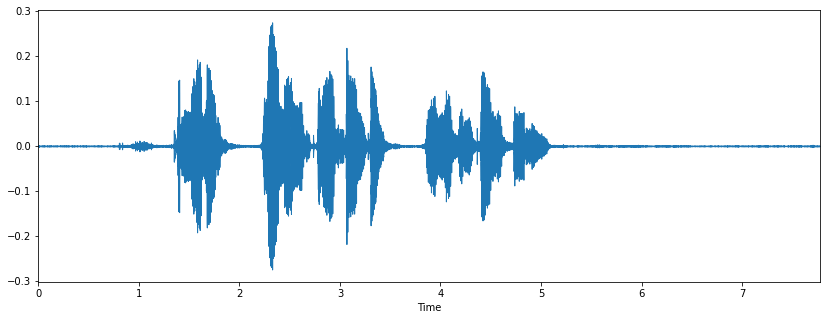

In [4]:
filename='welcome.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

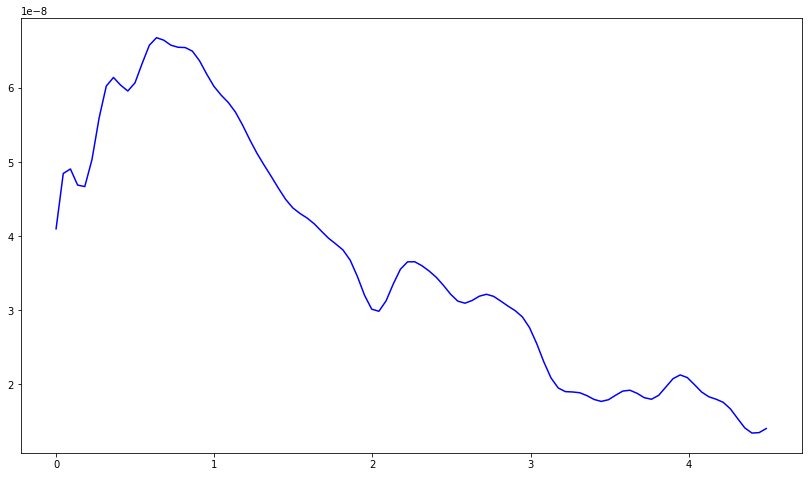

In [5]:
# Normalize the Signal Value and Plot it on a graph (Resolution)
pow_audio_signal = data / np.power(2, 15)
pow_audio_signal = pow_audio_signal [:100]
time_axis = 1000 * np.arange(0, len(pow_audio_signal), 1) / float(sample_rate)
plt.figure(figsize=(14, 8))
plt.plot(time_axis, pow_audio_signal, color='blue')

In [ ]:
sample_rate

22050

Spectogram:

A spectrogram is a visual representation of the spectrum of frequencies of sound as they vary with time. It’s a representation of frequencies changing with respect to time for given music signals.'.stft' converts data into short term Fourier transform. STFT converts signal such that we can know the amplitude of given frequency at a given time. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal.

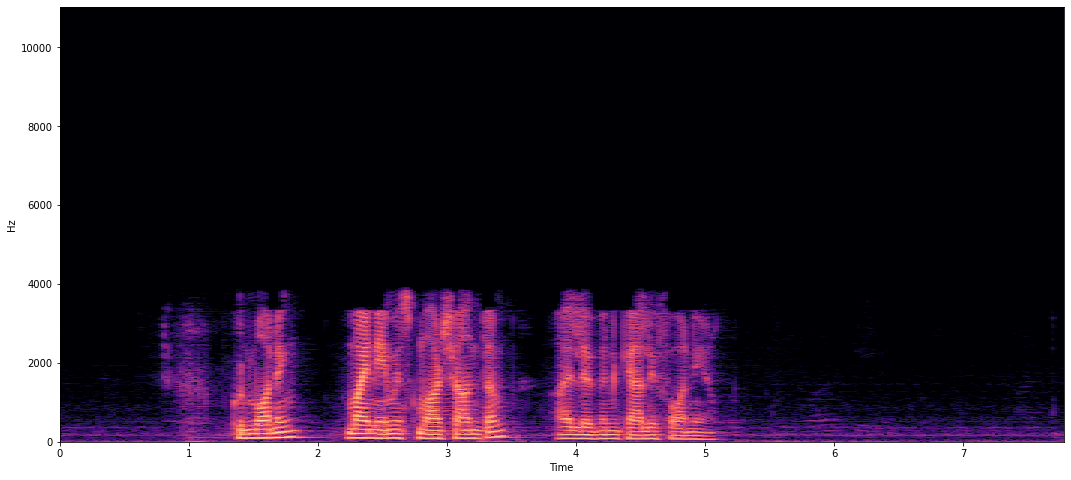

In [ ]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(18, 8))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')

In [11]:
# Zero Crossing Rate- The zero crossing rate indicates the number of times that a signal crosses the horizontal axis. Let's Zoom in and make the wave simpler so that we can calculate Zero crossing rate manually and verify.
zcrs = librosa.zero_crossings(data, pad=False)
print(zcrs.shape)


(171417,)


In [12]:
print(sum(zcrs))

6378


(1, 335)


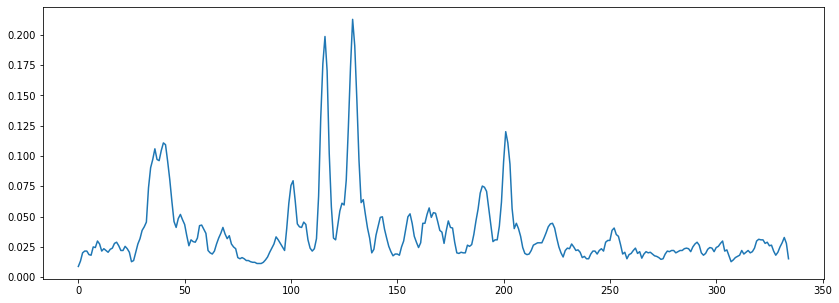

In [14]:
zcrs = librosa.feature.zero_crossing_rate(data)
print(zcrs.shape)
plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])



(-0.001, 0.001)

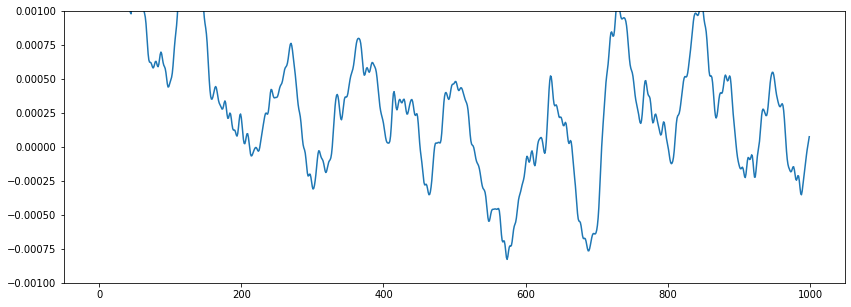

In [16]:
#The reason for the high rate near the beginning of above plot is because the silence oscillates quietly around zero
plt.figure(figsize=(14, 5)) 
plt.plot(data[:1000]) #starting 1000 samples
plt.ylim(-0.001, 0.001)

In [ ]:
# Spectral Centroid: The spectral centroid (Wikipedia) indicates at which frequency the energy of a spectrum is centered upon.

spectral_centroids = librosa.feature.spectral_centroid(data, sr=sample_rate)[0]
spectral_centroids.shape

(335,)

In [ ]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

In [17]:
# Spectral Contrast

spectral_contrast = librosa.feature.spectral_contrast(data, sr=sample_rate)
spectral_contrast.shape

(7, 335)

In [19]:
# Normalizing function
import sklearn
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

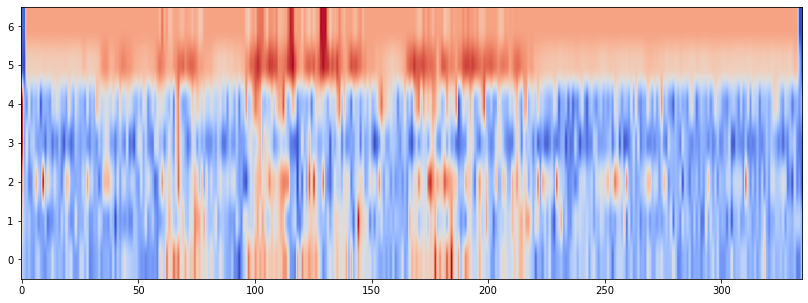

In [21]:
plt.figure(figsize=(14, 5))
plt.imshow(normalize(spectral_contrast, axis=1), aspect='auto', origin='lower', cmap='coolwarm')

High contrast values generally correspond to clear, narrow-band signals, while low contrast values correspond to broad-band noise. Here the energy contrast is measured by comparing the mean energy in the peak energy frame to that of the bottom or valley energy frame.

In [ ]:
# Spectral Bandwidth


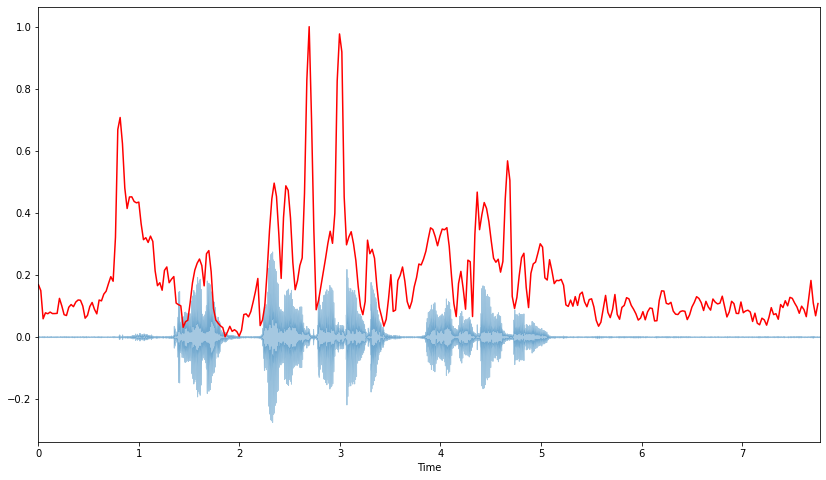

In [ ]:
librosa.display.waveplot(data, sr=sample_rate, alpha=0.4)
# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [14, 8]
plt.plot(t, normalize(spectral_centroids), color='r')


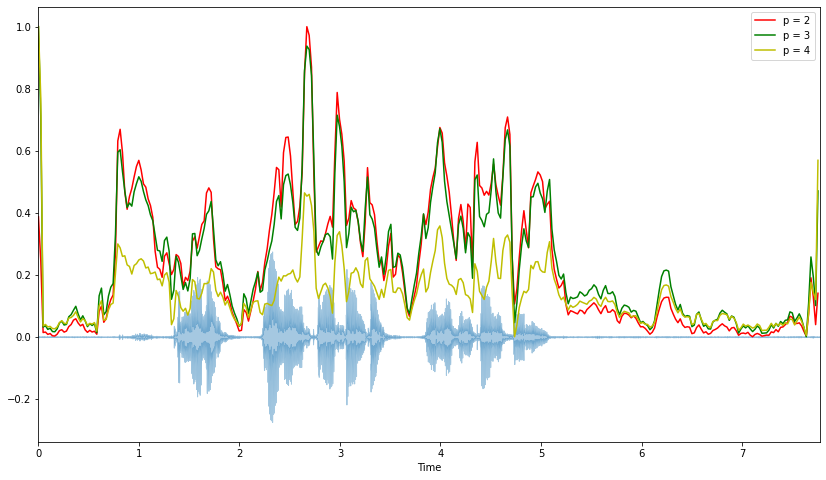

In [ ]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(data+0.01, sr=sample_rate)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(data+0.01, sr=sample_rate, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(data+0.01, sr=sample_rate, p=4)[0]
librosa.display.waveplot(data, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

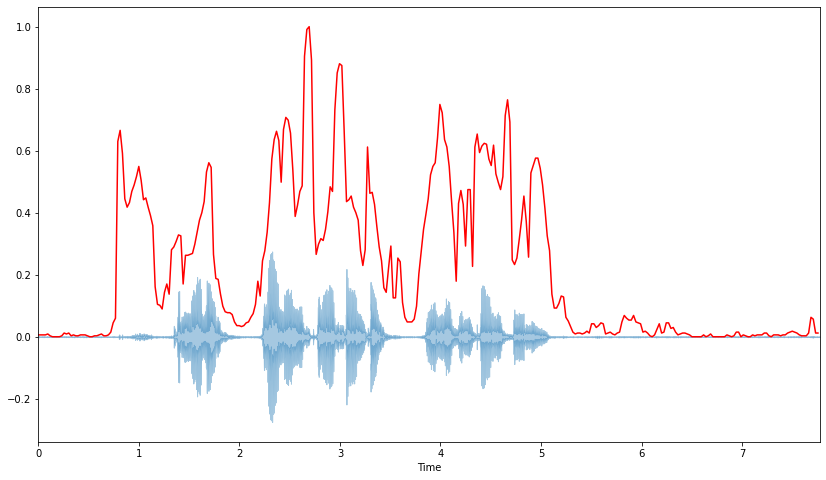

In [ ]:
# Spectral Roll off: Spectral rolloff is the frequency below which a specified percentage of the total spectral energy lies.


spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sample_rate)[0]
librosa.display.waveplot(data, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

The spectral roll-off point is the fraction of bins in the power spectrum at which 85% of the power is at lower frequencies

This can be used for calculating the maximum and minimum by setting up the roll percent to a value close to 1 and 0.

Pitches and Magnitudes

Pitch is a perceptual property of sounds that allows their ordering on a frequency-related scale, or more commonly, pitch is the quality that makes it possible to judge sounds as "higher" and "lower" in the sense associated with musical melodies.

In [ ]:
pitches, magnitudes = librosa.piptrack(y=data, sr=sample_rate)
print(pitches)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(magnitudes)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Chroma Feature

A chroma vector is a typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, ..., B}, is present in the signal.

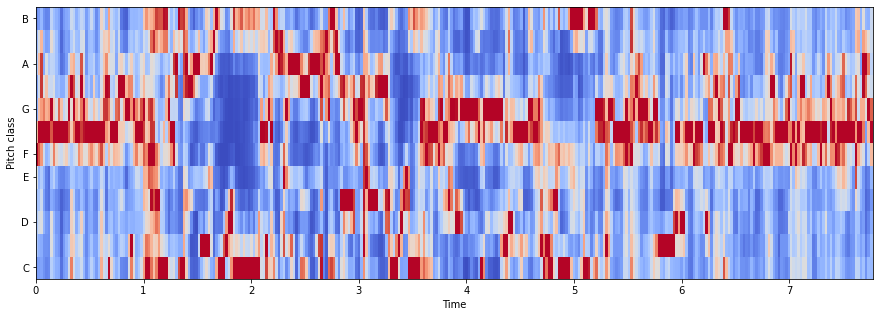

In [ ]:
#chroma features
chromagram = librosa.feature.chroma_stft(data, sr=sample_rate, hop_length=512)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')



Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

Three discrete mathematical models that go into this processing are the Discrete Cosine Transform (DCT), which is used for decorrelation of filter bank coefficients, also termed as whitening of sound, and Gaussian Mixture Models — Hidden Markov Models (GMMs-HMMs) that are a standard for Automatic Speech Recognition (ASR) algorithms.

Although, in the present day, when computation costs have gone down (thanks to Cloud Computing), deep learning speech systems that are less susceptible to noise, are used over these techniques.

DCT is a linear transformation algorithm, and it will therefore rule out a lot of useful signals, given sound is highly non-linear.

In [ ]:
# Feature Extraction
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate)
print(mfccs.shape)

(20, 335)


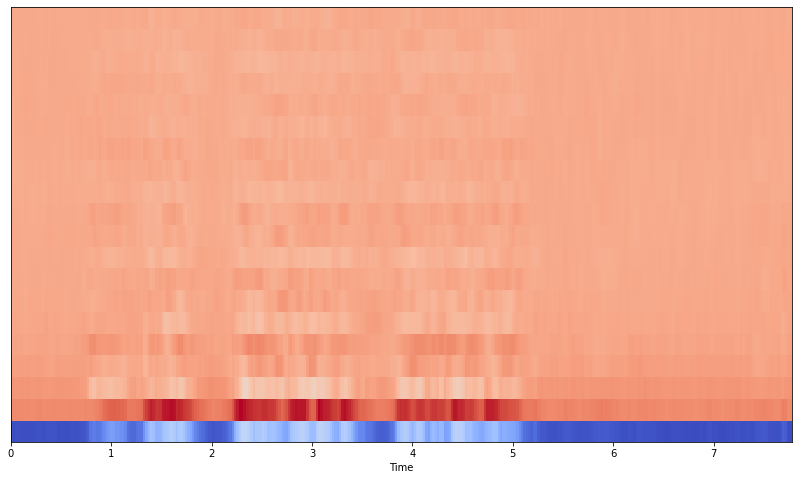

In [ ]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')